In this notebook, we clusterize our 200k entries so that each future customer could compare with persons owning his group.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_train.csv', index_col = 0)

In [3]:
X.shape

(181547, 15)

In [4]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT
114149,0,288000.0,497520.0,53712.0,450000.0,181,3090.0,1865,0.580895,0.358951,"(25.0, 30.0]",1.727500,0.186500,0.107959,1.105600
276288,0,270000.0,1303812.0,38250.0,1138500.0,2479,4981.0,3527,0.767787,0.399676,"(30.0, 35.0]",4.828933,0.141667,0.029337,1.145202
171531,1,202500.0,397881.0,26716.5,328500.0,805,4852.0,2929,0.764524,0.759712,"(25.0, 30.0]",1.964844,0.131933,0.067147,1.211205
53072,0,135000.0,610335.0,18634.5,463500.0,3844,1506.0,4039,0.571914,0.771362,"(30.0, 35.0]",4.521000,0.138033,0.030532,1.316796
195442,0,157500.0,316296.0,12051.0,207000.0,1669,4893.0,4906,0.674415,0.501075,"(40.0, 45.0]",2.008229,0.076514,0.038100,1.528000


In [5]:
X['AGE'].unique()

array(['(25.0, 30.0]', '(30.0, 35.0]', '(40.0, 45.0]', '(50.0, 55.0]',
       '(35.0, 40.0]', '(45.0, 50.0]', '(20.0, 25.0]', '(55.0, 60.0]',
       '(60.0, 65.0]', '(65.0, 70.0]'], dtype=object)

In [6]:
X.loc[X['AGE'] == '(20.0, 25.0]', 'AGE'] = 22.5
X.loc[X['AGE'] == '(25.0, 30.0]', 'AGE'] = 27.5
X.loc[X['AGE'] == '(30.0, 35.0]', 'AGE'] = 32.5
X.loc[X['AGE'] == '(35.0, 40.0]', 'AGE'] = 37.5
X.loc[X['AGE'] == '(40.0, 45.0]', 'AGE'] = 42.5
X.loc[X['AGE'] == '(45.0, 50.0]', 'AGE'] = 47.5
X.loc[X['AGE'] == '(50.0, 55.0]', 'AGE'] = 52.5
X.loc[X['AGE'] == '(55.0, 60.0]', 'AGE'] = 57.5
X.loc[X['AGE'] == '(60.0, 65.0]', 'AGE'] = 62.5
X.loc[X['AGE'] == '(65.0, 70.0]', 'AGE'] = 67.5

In [7]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT
114149,0,288000.0,497520.0,53712.0,450000.0,181,3090.0,1865,0.580895,0.358951,27.5,1.727500,0.186500,0.107959,1.105600
276288,0,270000.0,1303812.0,38250.0,1138500.0,2479,4981.0,3527,0.767787,0.399676,32.5,4.828933,0.141667,0.029337,1.145202
171531,1,202500.0,397881.0,26716.5,328500.0,805,4852.0,2929,0.764524,0.759712,27.5,1.964844,0.131933,0.067147,1.211205
53072,0,135000.0,610335.0,18634.5,463500.0,3844,1506.0,4039,0.571914,0.771362,32.5,4.521000,0.138033,0.030532,1.316796
195442,0,157500.0,316296.0,12051.0,207000.0,1669,4893.0,4906,0.674415,0.501075,42.5,2.008229,0.076514,0.038100,1.528000


Text(0, 0.5, 'Inertia')

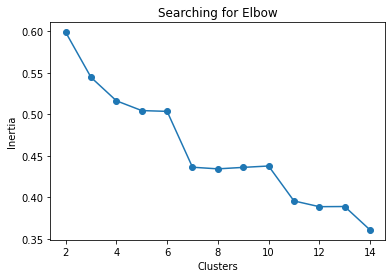

In [8]:
from sklearn import cluster, metrics

# Initialization, empty list
silhouettes = []

for num_clusters in range(2, 15):
    
    # Creating KMEANS for each number of clusters
    cls = cluster.KMeans(n_clusters=num_clusters)
    
    # Fitting model
    cls.fit(X)
    
    # Silhouette_score for each model
    silh = metrics.silhouette_score(X,cls.labels_)
    
    # Adding score in empty list for each model
    silhouettes.append(silh)
    
    

plt.plot(range(2, 15), silhouettes, marker = 'o')
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [9]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA

cls = cluster.KMeans(n_clusters = 12)

# Creating PCA
pca = PCA(n_components = 2)

# Fit
pca.fit(X)

# We want to see the explained variance of our 2 features
print (pca.explained_variance_ratio_.cumsum())

# Transforming our X in 2 dimensions
X_trans_2= pca.transform(X)

[0.96249504 0.99318288]


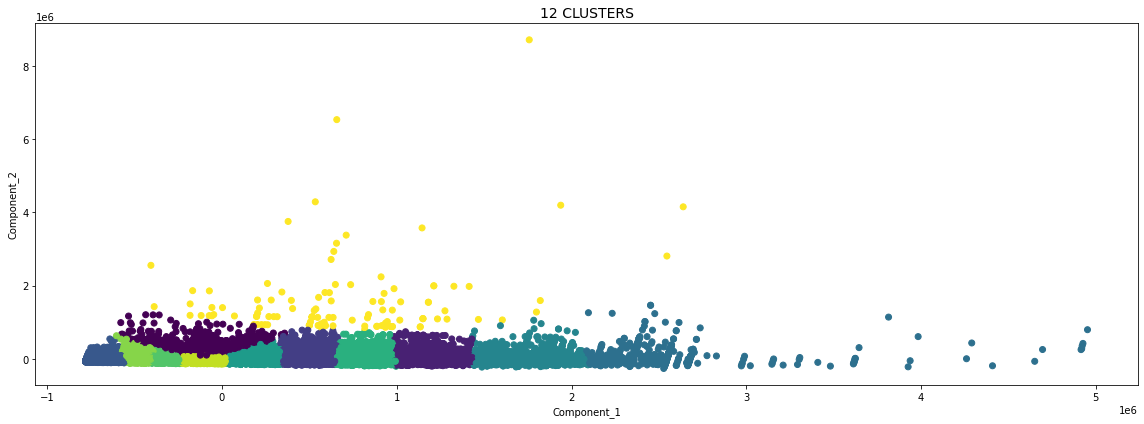

In [10]:
fig = plt.figure(figsize = [16,6])

# 3 clusters
cls = cluster.KMeans(n_clusters = 12)
cls.fit(X_trans_2)

# 
ax = fig.gca()  

# Spatial coordinates of each point in function of our 3 components
x = X_trans_2[:,0]
y = X_trans_2[:,1]


# Plotting scatters distinguishing our 2 clusters
ax.scatter(x, y, label='', marker = 'o',c = cls.labels_)

# Naming axes
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')


# Title
plt.title("12 CLUSTERS", fontsize = 14)

plt.tight_layout()
plt.show()


In [11]:
# fitting with our data
km = cls.fit(X)

In [12]:
km

KMeans(n_clusters=12)

In [13]:
import pickle

In [14]:
pickle.dump (km, open ('clustering', 'wb'))

In [15]:
# Labels
km.labels_

array([11,  8,  0, ...,  6,  5, 10])

In [16]:
#check
km.labels_.shape

(181547,)

In [19]:
# Adding membership group on your DataFrame

MEMBERSHIP = km.labels_
X['MEMBERSHIP'] = MEMBERSHIP
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
114149,0,288000.0,497520.0,53712.0,450000.0,181,3090.0,1865,0.580895,0.358951,27.5,1.727500,0.186500,0.107959,1.105600,11
276288,0,270000.0,1303812.0,38250.0,1138500.0,2479,4981.0,3527,0.767787,0.399676,32.5,4.828933,0.141667,0.029337,1.145202,8
171531,1,202500.0,397881.0,26716.5,328500.0,805,4852.0,2929,0.764524,0.759712,27.5,1.964844,0.131933,0.067147,1.211205,0
53072,0,135000.0,610335.0,18634.5,463500.0,3844,1506.0,4039,0.571914,0.771362,32.5,4.521000,0.138033,0.030532,1.316796,6
195442,0,157500.0,316296.0,12051.0,207000.0,1669,4893.0,4906,0.674415,0.501075,42.5,2.008229,0.076514,0.038100,1.528000,5


In [20]:
X0 = X[X['MEMBERSHIP']== 0]

In [21]:
X0.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
171531,1,202500.0,397881.0,26716.5,328500.0,805,4852.0,2929,0.764524,0.759712,27.5,1.964844,0.131933,0.067147,1.211205,0
58732,1,225000.0,473760.0,53581.5,450000.0,1836,1443.0,2333,0.581390,0.318596,52.5,2.105600,0.238140,0.113098,1.052800,0
251203,1,126000.0,450000.0,12001.5,450000.0,98,3878.0,4009,0.676576,0.547810,42.5,3.571429,0.095250,0.026670,1.000000,0
196278,1,112500.0,450000.0,20979.0,450000.0,123,3756.0,1289,0.617975,0.360613,22.5,4.000000,0.186480,0.046620,1.000000,0
47014,0,101250.0,490536.0,17748.0,405000.0,7006,5.0,5544,0.734265,0.508287,42.5,4.844800,0.175289,0.036181,1.211200,0


In [22]:
# Dimensions
X0.shape

(21214, 16)

In [23]:
# Stat0
stat0 = X0.describe()
stat0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.000000,21214.0
mean,0.501791,157180.573607,440140.581456,25675.926864,407726.740148,2273.675874,4535.078865,2849.853399,0.507321,0.478515,3.201228,0.180847,0.058282,1.091006,0.0
std,0.773611,55663.317293,39104.647425,8884.812037,50561.249099,2239.268430,3216.506544,1468.407670,0.190912,0.199500,1.319501,0.081121,0.018989,0.130046,0.0
min,0.000000,27000.000000,135000.000000,6750.000000,135000.000000,13.000000,0.000000,0.000000,0.000005,0.000527,0.714286,0.033343,0.026369,0.150000,0.0
25%,0.000000,112500.000000,414000.000000,20250.000000,360000.000000,746.000000,1754.250000,1612.000000,0.384560,0.328063,2.250000,0.125000,0.048381,1.000000,0.0
50%,0.000000,157500.000000,450000.000000,22977.000000,427500.000000,1573.500000,4185.000000,2924.000000,0.556830,0.493863,2.885714,0.163100,0.051364,1.000000,0.0
75%,1.000000,193500.000000,454500.000000,29882.250000,450000.000000,3023.000000,6736.750000,4172.000000,0.657725,0.639708,3.814215,0.220279,0.067120,1.158402,0.0
max,7.000000,360000.000000,630000.000000,59175.000000,900000.000000,16429.000000,20981.000000,7197.000000,0.855000,0.882530,17.780000,1.095833,0.119053,4.666667,0.0


In [24]:
stat0.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat0.csv')

In [25]:
#########################################################################################################################

In [26]:
X1 = X[X['MEMBERSHIP']== 1]

In [27]:
# Dimensions
X1.shape

(18960, 16)

In [28]:
# Stat1
stat1 = X1.describe()
stat1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,18960.000000,18960.000000,1.896000e+04,18960.000000,1.896000e+04,18960.000000,18960.000000,18960.000000,18960.000000,18960.000000,18960.000000,18960.000000,18960.000000,18960.000000,18960.0
mean,0.496414,210784.549391,9.913691e+05,38759.216535,8.901427e+05,2648.480380,4691.202637,2894.496783,0.543814,0.512869,5.702227,0.214287,0.039293,1.116788,1.0
std,0.756698,103067.005528,8.108270e+04,11576.585251,5.249529e+04,2435.592959,3311.949497,1523.482380,0.179233,0.189020,2.569458,0.093691,0.012251,0.104360,0.0
min,0.000000,27000.000000,6.750000e+05,21960.000000,6.750000e+05,0.000000,0.000000,1.000000,0.000016,0.000527,0.909091,0.026380,0.026376,0.500000,1.0
25%,0.000000,135000.000000,9.000000e+05,30717.000000,9.000000e+05,904.000000,1822.000000,1565.000000,0.448974,0.379100,3.992204,0.146925,0.029368,1.000000,1.0
50%,0.000000,180000.000000,1.005120e+06,35739.000000,9.000000e+05,1922.000000,4328.000000,3058.000000,0.594155,0.537070,5.263158,0.197800,0.035571,1.118800,1.0
75%,1.000000,247500.000000,1.061600e+06,45000.000000,9.000000e+05,3567.000000,7079.250000,4245.000000,0.677711,0.662638,6.896552,0.262192,0.045305,1.198000,1.0
max,11.000000,990000.000000,1.224990e+06,104094.000000,1.350000e+06,16495.000000,21865.000000,6214.000000,0.855000,0.885488,33.333333,0.974667,0.107845,1.396000,1.0


In [29]:
stat1.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat1.csv')

In [30]:
###############################################################################################################################

In [31]:
X2 = X[X['MEMBERSHIP']== 2]

In [32]:
# Dimensions
X2.shape

(6710, 16)

In [33]:
# Stat2
stat2 = X2.describe()
stat2

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,6710.000000,6710.000000,6.710000e+03,6710.000000,6.710000e+03,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.000000,6710.0
mean,0.463487,249785.040387,1.469222e+06,48507.929732,1.371089e+06,2861.035618,4704.014903,2975.290164,0.580795,0.540536,7.014108,0.225496,0.033164,1.073418,2.0
std,0.750471,118793.969242,1.095610e+05,12408.625098,8.308013e+04,2532.406949,3327.199184,1509.975868,0.163800,0.180816,2.908002,0.092562,0.008966,0.080459,0.0
min,0.000000,40500.000000,1.282500e+06,33556.500000,1.125000e+06,20.000000,0.000000,0.000000,0.000151,0.000527,1.395064,0.039470,0.025278,1.000000,2.0
25%,0.000000,180000.000000,1.350000e+06,40815.000000,1.350000e+06,1000.250000,1813.250000,1752.500000,0.503192,0.415347,5.000000,0.160080,0.027582,1.000000,2.0
50%,0.000000,225000.000000,1.485000e+06,45202.500000,1.350000e+06,2183.500000,4284.000000,3203.500000,0.627185,0.567379,6.666667,0.211325,0.029325,1.071279,2.0
75%,1.000000,292500.000000,1.546020e+06,53248.500000,1.363500e+06,3891.750000,7136.750000,4287.000000,0.702056,0.684828,8.589000,0.275179,0.035919,1.145200,2.0
max,5.000000,990000.000000,1.746684e+06,150759.000000,1.602000e+06,15629.000000,20452.000000,6160.000000,0.820610,0.882530,32.222222,0.964300,0.100000,1.277202,2.0


In [34]:
stat2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat2.csv')

In [35]:
###############################################################################################################################

In [36]:
X3 = X[X['MEMBERSHIP']== 3]

In [37]:
# Dimensions
X3.shape

(22108, 16)

In [38]:
# Stat3
stat3 = X3.describe()
stat3

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.000000,22108.0
mean,0.538086,125229.911243,152973.945269,10874.517867,140374.109530,2202.964945,4565.083363,2752.734530,0.486712,0.498625,1.437924,0.100921,0.074367,1.102000,3.0
std,0.779682,55904.637117,42623.964075,3869.530880,41152.186125,2246.390484,3145.900418,1489.511022,0.190306,0.199782,0.720635,0.051483,0.024871,0.138003,0.0
min,0.000000,26550.000000,45000.000000,1980.000000,40500.000000,10.000000,0.000000,1.000000,0.000001,0.000527,0.116379,0.008824,0.026365,0.500000,3.0
25%,0.000000,90000.000000,127906.875000,8707.500000,112500.000000,709.000000,1906.750000,1444.000000,0.357194,0.349055,0.909091,0.065115,0.050000,1.000000,3.0
50%,0.000000,112500.000000,159264.000000,9895.500000,135000.000000,1468.000000,4216.000000,2797.000000,0.532754,0.520898,1.320667,0.090700,0.067797,1.066000,3.0
75%,1.000000,157500.000000,180000.000000,13095.000000,180000.000000,2908.250000,6730.000000,4126.000000,0.636250,0.659406,1.805714,0.126717,0.099812,1.158400,3.0
max,19.000000,765000.000000,315000.000000,26730.000000,270000.000000,17139.000000,19488.000000,6226.000000,0.855000,0.882530,7.500000,0.547286,0.124429,6.000000,3.0


In [39]:
stat3.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat3.csv')

In [40]:
###############################################################################################################################

In [41]:
X4 = X[X['MEMBERSHIP']== 4]

In [42]:
# Dimensions
X4.shape

(29129, 16)

In [43]:
# Stat4
stat4 = X4.describe()
stat4

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129.0
mean,0.492842,182239.639932,761939.575629,33017.366199,677722.345206,2638.005012,4808.081053,2909.064129,0.531265,0.507413,4.948070,0.205420,0.043745,1.126618,4.0
std,0.764962,75598.769710,75109.526393,10574.265011,42056.210987,2476.987714,3317.651686,1511.832917,0.182494,0.192641,2.229563,0.089453,0.014998,0.113417,0.0
min,0.000000,27000.000000,382500.000000,16618.500000,517500.000000,1.000000,0.000000,0.000000,0.000039,0.000527,1.472767,0.044075,0.026373,0.425000,4.0
25%,0.000000,135000.000000,679500.000000,25866.000000,675000.000000,869.000000,1928.000000,1625.000000,0.427415,0.368969,3.355556,0.142533,0.032421,1.000000,4.0
50%,0.000000,171000.000000,756000.000000,30694.500000,675000.000000,1891.000000,4470.000000,3076.000000,0.581166,0.529890,4.492500,0.189600,0.039828,1.118800,4.0
75%,1.000000,225000.000000,808650.000000,36940.500000,679500.000000,3556.000000,7257.000000,4245.000000,0.670020,0.662638,6.000000,0.250540,0.050000,1.198000,4.0
max,12.000000,562500.000000,967428.000000,87111.000000,900000.000000,16767.000000,19636.000000,6551.000000,0.855000,0.885488,25.000000,1.076067,0.118879,1.396000,4.0


In [44]:
stat4.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat4.csv')

In [45]:
###########################################################################################################################

In [46]:
X5 = X[X['MEMBERSHIP']== 5]

In [47]:
# Dimensions
X5.shape

(38853, 16)

In [48]:
# Stat5
stat5 = X5.describe()
stat5

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.000000,38853.0
mean,0.525236,148841.941932,281394.774612,18042.620338,249773.122770,2337.022547,4594.535789,2846.464314,0.502766,0.493976,2.237509,0.139696,0.065053,1.133542,5.0
std,0.768212,65122.135165,41466.169114,5708.569059,33978.058671,2343.481384,3203.581663,1480.501761,0.192662,0.200182,1.007980,0.065595,0.021704,0.146364,0.0
min,0.000000,27000.000000,135000.000000,5935.500000,90000.000000,5.000000,0.000000,1.000000,0.000010,0.000527,0.233333,0.011667,0.026364,0.333333,5.0
25%,0.000000,108454.500000,252000.000000,13500.000000,225000.000000,746.000000,1873.000000,1593.000000,0.375935,0.345785,1.522857,0.094100,0.050000,1.000000,5.0
50%,0.000000,135000.000000,270000.000000,16852.500000,238500.000000,1590.000000,4246.000000,2931.000000,0.553417,0.515495,2.033333,0.128036,0.056297,1.105604,5.0
75%,1.000000,180000.000000,314100.000000,21861.000000,270000.000000,3088.000000,6794.000000,4181.000000,0.654567,0.656158,2.765267,0.171400,0.079007,1.211200,5.0
max,12.000000,675000.000000,450000.000000,42894.000000,495000.000000,17912.000000,22701.000000,6259.000000,0.855000,0.887664,12.733333,0.693171,0.124430,3.500000,5.0


In [49]:
stat5.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat5.csv')

In [50]:
#########################################################################################################################

In [51]:
X6 = X[X['MEMBERSHIP']== 6]

In [52]:
# Dimensions
X6.shape

(24361, 16)

In [53]:
# Stat6
stat6 = X6.describe()
stat6

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,24361.000000,24361.000000,24361.000000,24361.000000,24361.000000,24361.000000,24361.00000,24361.000000,24361.000000,24361.000000,24361.000000,24361.000000,24361.000000,24361.000000,24361.0
mean,0.510283,157734.795830,565015.319158,27491.621444,480262.079759,2437.362588,4666.72850,2860.348918,0.504781,0.492039,4.060212,0.192380,0.049041,1.182868,6.0
std,0.773209,52446.603269,47729.702815,7597.947673,43163.686180,2392.738202,3281.73543,1498.417593,0.192722,0.196646,1.639501,0.078559,0.014505,0.119632,0.0
min,0.000000,31500.000000,270000.000000,12951.000000,364500.000000,4.000000,0.00000,0.000000,0.000012,0.000527,1.783333,0.050600,0.026372,0.300000,6.0
25%,0.000000,112500.000000,526491.000000,22216.500000,450000.000000,785.000000,1824.00000,1592.000000,0.380063,0.345785,2.888889,0.137500,0.038972,1.118800,6.0
50%,0.000000,157500.000000,545040.000000,26640.000000,463500.000000,1692.000000,4292.00000,2972.000000,0.555631,0.511892,3.712800,0.176440,0.048338,1.158404,6.0
75%,1.000000,202500.000000,593010.000000,31131.000000,495000.000000,3192.000000,6994.00000,4204.000000,0.655303,0.651260,4.807692,0.231520,0.054249,1.237602,6.0
max,14.000000,292500.000000,728712.000000,74907.000000,900000.000000,16304.000000,22442.00000,6383.000000,0.820616,0.893976,18.322500,0.989934,0.118944,1.528000,6.0


In [54]:
stat6.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat6.csv')

In [55]:
###############################################################################################################################

In [56]:
X7 = X[X['MEMBERSHIP']== 7]

In [57]:
# Dimensions
X7.shape

(745, 16)

In [58]:
# Stat7
stat7 = X7.describe()
stat7

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,745.000000,7.450000e+02,7.450000e+02,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.0
mean,0.475168,3.888975e+05,2.412463e+06,74425.040940,2.253588e+06,2865.000000,4461.711409,3075.311409,0.616236,0.557709,7.756850,0.226712,0.030988,1.072780,7.0
std,0.742155,2.317145e+05,2.663080e+05,28907.785452,2.607681e+05,2782.423527,3250.959559,1527.343011,0.145410,0.176178,3.341659,0.093125,0.012275,0.067694,0.0
min,0.000000,9.000000e+04,2.031651e+06,55791.000000,1.890000e+06,82.000000,0.000000,8.000000,0.031306,0.071533,1.250000,0.037269,0.024740,1.000000,7.0
25%,0.000000,2.334825e+05,2.250000e+06,59895.000000,2.236500e+06,885.000000,1576.000000,1874.000000,0.561896,0.436506,5.434783,0.158333,0.026427,1.000000,7.0
50%,0.000000,3.150000e+05,2.316010e+06,66532.500000,2.250000e+06,2045.000000,4038.000000,3399.000000,0.661784,0.593718,7.240000,0.217426,0.026438,1.095040,7.0
75%,1.000000,4.500000e+05,2.517300e+06,74110.500000,2.250000e+06,3800.000000,6748.000000,4342.000000,0.719790,0.694093,10.000000,0.285000,0.030319,1.118800,7.0
max,4.000000,1.800000e+06,4.050000e+06,258025.500000,4.050000e+06,15474.000000,15295.000000,6096.000000,0.808747,0.865056,27.970000,0.833333,0.100000,1.198000,7.0


In [59]:
stat7.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat7.csv')

In [60]:
############################################################################################################################

In [61]:
X8 = X[X['MEMBERSHIP']== 8]

In [62]:
# Dimensions
X8.shape

(12007, 16)

In [63]:
# Stat8
stat8 = X8.describe()
stat8

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,12007.000000,12007.000000,1.200700e+04,12007.000000,1.200700e+04,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.000000,12007.0
mean,0.483884,218813.528940,1.223071e+06,41939.356126,1.108221e+06,2854.781877,4787.886066,2919.852836,0.558007,0.526694,6.700343,0.224477,0.034406,1.107819,8.0
std,0.759231,103033.788501,8.228836e+04,10706.321654,6.991698e+04,2568.976178,3342.863031,1532.873444,0.173663,0.185809,2.904204,0.098145,0.009203,0.100400,0.0
min,0.000000,40500.000000,8.550000e+05,27895.500000,8.775000e+05,9.000000,0.000000,0.000000,0.000123,0.000527,1.219048,0.033662,0.025277,0.633333,8.0
25%,0.000000,157500.000000,1.129500e+06,35653.500000,1.102500e+06,995.000000,1892.000000,1595.500000,0.472076,0.397946,4.683067,0.156229,0.029337,1.000000,8.0
50%,0.000000,202500.000000,1.234742e+06,37800.000000,1.125000e+06,2140.000000,4432.000000,3103.000000,0.607280,0.551381,6.250000,0.208857,0.029356,1.116161,8.0
75%,1.000000,270000.000000,1.288350e+06,46480.500000,1.125000e+06,3883.000000,7262.000000,4274.000000,0.686752,0.675413,8.208815,0.275057,0.039657,1.145200,8.0
max,5.000000,945000.000000,1.454094e+06,123750.000000,1.350000e+06,16069.000000,22928.000000,6166.000000,0.855000,0.882530,30.197778,1.282667,0.100000,1.396000,8.0


In [64]:
stat8.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat8.csv')

In [65]:
#############################################################################################################################

In [66]:
X9 = X[X['MEMBERSHIP']== 9]

In [67]:
# Dimensions
X9.shape

(111, 16)

In [68]:
# Stat9
stat9 = X9.describe()
stat9

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,111.000000,1.110000e+02,1.110000e+02,111.000000,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0
mean,0.468468,1.823956e+06,1.046917e+06,52550.229730,9.856622e+05,2496.297297,3838.315315,2795.144144,0.575794,0.490114,0.677185,0.032373,0.050627,1.073872,9.0
std,0.711207,1.128612e+06,3.649166e+05,30584.835146,3.642180e+05,2073.829214,3240.863586,1616.331114,0.182487,0.189628,0.300212,0.015310,0.017747,0.099468,0.0
min,0.000000,1.035000e+06,1.800000e+05,9000.000000,1.800000e+05,18.000000,7.000000,28.000000,0.013457,0.090815,0.066667,0.003333,0.027497,1.000000,9.0
25%,0.000000,1.271250e+06,8.425328e+05,36996.750000,7.492500e+05,982.500000,959.000000,1287.500000,0.499955,0.337720,0.441906,0.021250,0.039788,1.000000,9.0
50%,0.000000,1.350000e+06,1.006920e+06,47794.500000,9.000000e+05,1963.000000,2986.000000,2886.000000,0.627668,0.520898,0.666667,0.031073,0.050000,1.029041,9.0
75%,1.000000,1.957500e+06,1.276544e+06,62203.500000,1.129500e+06,3423.500000,6415.500000,4260.000000,0.729616,0.653691,0.902960,0.040949,0.053393,1.118800,9.0
max,3.000000,9.000000e+06,2.250000e+06,225000.000000,2.250000e+06,9524.000000,10743.000000,6001.000000,0.799578,0.863363,1.305267,0.080000,0.102732,1.422400,9.0


In [69]:
stat9.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat9.csv')

In [70]:
###############################################################################################################################

In [71]:
X10 = X[X['MEMBERSHIP']== 10]

In [72]:
# Dimensions
X10.shape

(3138, 16)

In [73]:
# Stat10
stat10 = X10.describe()
stat10

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,3138.000000,3.138000e+03,3.138000e+03,3138.000000,3.138000e+03,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.0
mean,0.474187,2.928880e+05,1.859048e+06,58921.798279,1.721056e+06,2913.948693,4552.355003,3008.822180,0.598542,0.533351,7.476797,0.233347,0.031751,1.082001,10.0
std,0.743564,1.347498e+05,1.274618e+05,13082.698969,1.160817e+05,2550.829653,3316.648808,1541.074193,0.154017,0.183983,2.989655,0.095857,0.007092,0.062922,0.0
min,0.000000,5.400000e+04,1.575000e+06,41548.500000,1.444500e+06,36.000000,1.000000,3.000000,0.004792,0.000527,1.333333,0.039083,0.025279,1.000000,10.0
25%,0.000000,2.025000e+05,1.762110e+06,49500.000000,1.575000e+06,1035.250000,1630.750000,1680.000000,0.530998,0.400109,5.333333,0.165129,0.027499,1.000000,10.0
50%,0.000000,2.700000e+05,1.800000e+06,55507.500000,1.800000e+06,2250.000000,4082.500000,3233.500000,0.641724,0.560284,6.992500,0.220000,0.028658,1.095040,10.0
75%,1.000000,3.600000e+05,1.971072e+06,64350.000000,1.800000e+06,3993.000000,6865.000000,4348.750000,0.709046,0.676993,9.046535,0.283505,0.034825,1.118800,10.0
max,4.000000,1.350000e+06,2.221092e+06,184477.500000,2.070000e+06,16632.000000,16970.000000,6207.000000,0.818404,0.880268,31.938667,1.112583,0.100000,1.198000,10.0


In [74]:
stat10.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat10.csv')

In [75]:
##############################################################################################################################

In [76]:
X11 = X[X['MEMBERSHIP']== 11]

In [77]:
# Dimensions
X11.shape

(4211, 16)

In [78]:
# Stat11
stat11 = X11.describe()
stat11

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_ANNUITY_PERCENT,CREDIT_GOOD_PERCENT,MEMBERSHIP
count,4211.000000,4.211000e+03,4211.000000,4211.000000,4.211000e+03,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.0
mean,0.543576,4.036989e+05,536424.865946,33064.815958,4.823472e+05,2451.037996,4171.970078,2890.449537,0.565882,0.456004,1.422058,0.087342,0.062756,1.118775,11.0
std,0.787484,1.329488e+05,97747.446882,11660.301260,9.011018e+04,2192.568993,3194.415292,1516.994734,0.177700,0.199697,0.375078,0.034624,0.022453,0.123764,0.0
min,0.000000,2.610000e+05,135000.000000,6750.000000,1.350000e+05,11.000000,0.000000,1.000000,0.000030,0.000527,0.120000,0.006000,0.026371,0.250000,11.0
25%,0.000000,3.150000e+05,473760.000000,24840.000000,4.500000e+05,906.500000,1357.500000,1611.500000,0.479562,0.303146,1.188165,0.062733,0.048359,1.000000,11.0
50%,0.000000,3.600000e+05,528633.000000,30676.500000,4.500000e+05,1836.000000,3772.000000,3060.000000,0.615944,0.465069,1.449275,0.082371,0.054248,1.105600,11.0
75%,1.000000,4.500000e+05,592560.000000,39627.000000,5.175000e+05,3239.500000,6348.500000,4245.000000,0.699647,0.617826,1.692994,0.107297,0.079003,1.198000,11.0
max,5.000000,1.350000e+06,942300.000000,86449.500000,1.012500e+06,15509.000000,17995.000000,6209.000000,0.855000,0.863363,2.293429,0.238815,0.119215,1.660000,11.0


In [79]:
stat11.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat11.csv')